In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'    

import pandas as pd
import numpy as np
import sklearn.preprocessing as p
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import keras.layers as l
from keras.models import Sequential

c:\users\aferraresso\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
data = pd.read_csv('input/data_before_direct.csv', parse_dates=['start_time']).sort_values('start_time').fillna(0)

data.shape

(14337, 55)

In [4]:
data.start_time.min(), data.start_time.max() 

(Timestamp('2015-07-25 17:51:36.806330'),
 Timestamp('2015-07-26 14:40:52.280043'))

In [5]:
import datetime
corte = datetime.datetime.strptime('2015-07-26 13:35', '%Y-%m-%d %H:%M')

In [6]:
train_data = data[data.start_time < corte]
test_data = data[data.start_time > corte]
print(train_data.shape)
print(test_data.shape)

(11073, 55)
(3264, 55)


In [7]:
labels = [c for c in data.columns if 'mode' in c]
num_cols = [c for c in data.columns if c not in labels and c not in ['start_time']]

In [8]:
scaler = p.StandardScaler()
scaler.fit(data[num_cols])

train_x = scaler.transform(train_data[num_cols])
test_x = scaler.transform(test_data[num_cols])

print(train_x.shape)
print(test_x.shape)

(11073, 48)
(3264, 48)


In [15]:
model = Sequential()
model.add(l.Dense(40, input_shape=(train_x.shape[1],), name='hidden_in', activation='relu'))
# model.add(l.Dropout(0.1))
# model.add(l.Dense(80, activation='relu'))
# model.add(l.Dropout(0.1))
model.add(l.Dense(30, name='bottleneck', activation='linear'))
model.add(l.Dense(40, name='hidden_out', activation='relu'))
# model.add(l.Dense(100, activation='relu'))
model.add(l.Dense(train_x.shape[1], name='output', activation='linear'))
model.compile(optimizer='adam', loss='mse')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_in (Dense)            (None, 40)                1960      
_________________________________________________________________
bottleneck (Dense)           (None, 30)                1230      
_________________________________________________________________
hidden_out (Dense)           (None, 40)                1240      
_________________________________________________________________
output (Dense)               (None, 48)                1968      
Total params: 6,398
Trainable params: 6,398
Non-trainable params: 0
_________________________________________________________________


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'
def plotit(history, min_epoch=0, show_all=True):
    legends = []
    if show_all:
        for val in history.history:
            plt.plot(history.history[val][min_epoch:])
            legends.append(val)
    else:
        plt.plot(history.history['loss'][min_epoch:])
        plt.plot(history.history['val_loss'][min_epoch:])
        legends = ['loss']
    plt.title('MSE del modelo')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(legends, loc='upper left')
    plt.show()

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce =  ReduceLROnPlateau(patience=5, factor=0.2, verbose=1)

history = model.fit(train_x, train_x, 
                    batch_size=512, epochs=200, 
                    validation_data=(test_x,test_x), 
                    callbacks=[reduce])

Train on 11073 samples, validate on 3264 samples
Epoch 1/200
11073/11073 [==============================] - 1s 60us/step - loss: 0.9782 - val_loss: 0.4973
Epoch 2/200
11073/11073 [==============================] - 0s 9us/step - loss: 0.7074 - val_loss: 0.4547
Epoch 3/200
11073/11073 [==============================] - 0s 14us/step - loss: 0.4759 - val_loss: 0.3897
Epoch 4/200
11073/11073 [==============================] - 0s 14us/step - loss: 0.3196 - val_loss: 0.3581
Epoch 5/200
11073/11073 [==============================] - 0s 14us/step - loss: 0.2453 - val_loss: 0.3299
Epoch 6/200
11073/11073 [==============================] - 0s 14us/step - loss: 0.1999 - val_loss: 0.3130
Epoch 7/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.1654 - val_loss: 0.2948
Epoch 8/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.1395 - val_loss: 0.2834
Epoch 9/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.1189 - val_loss: 0.279

11073/11073 [==============================] - 0s 13us/step - loss: 0.0089 - val_loss: 0.1725
Epoch 78/200
11073/11073 [==============================] - 0s 12us/step - loss: 0.0086 - val_loss: 0.1712
Epoch 79/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0084 - val_loss: 0.1707
Epoch 80/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0082 - val_loss: 0.1703
Epoch 81/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0080 - val_loss: 0.1708
Epoch 82/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0079 - val_loss: 0.1699
Epoch 83/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0078 - val_loss: 0.1692
Epoch 84/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0077 - val_loss: 0.1697
Epoch 85/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0076 - val_loss: 0.1699
Epoch 86/200
11073/11073 [========================

11073/11073 [==============================] - 0s 14us/step - loss: 0.0054 - val_loss: 0.1622
Epoch 148/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0054 - val_loss: 0.1622
Epoch 149/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0054 - val_loss: 0.1622
Epoch 150/200
11073/11073 [==============================] - 0s 12us/step - loss: 0.0054 - val_loss: 0.1622

Epoch 00150: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Epoch 151/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0054 - val_loss: 0.1622
Epoch 152/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0054 - val_loss: 0.1622
Epoch 153/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0054 - val_loss: 0.1622
Epoch 154/200
11073/11073 [==============================] - 0s 13us/step - loss: 0.0054 - val_loss: 0.1622
Epoch 155/200
11073/11073 [==============================] - 0s 13us/st

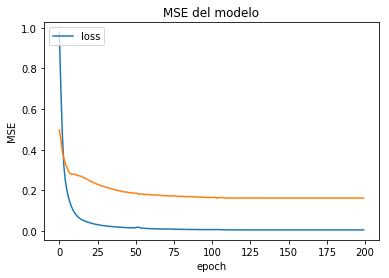

In [18]:
plotit(history, show_all=False)

In [19]:
infected = pd.read_csv('input/data_infected_direct.csv', parse_dates=['start_time']).sort_values('start_time').drop('start_time', axis=1)
infected.fillna(0, inplace=True)
infected_x = scaler.transform(infected[num_cols])

In [20]:
after = pd.read_csv('input/data_after_direct.csv', parse_dates=['start_time']).sort_values('start_time').drop('start_time', axis=1)
after.fillna(0, inplace=True)
after_x = scaler.transform(after[num_cols])

In [21]:
train_pred = model.predict(train_x)

In [22]:
test_pred = model.predict(test_x)

In [23]:
i_pred = model.predict(infected_x)

In [24]:
a_pred = model.predict(after_x)

In [25]:
train_error = ((train_x - train_pred) ** 2).mean(axis=-1) 
print(train_error.mean())
test_error = ((test_x - test_pred) ** 2).mean(axis=-1) 
print(test_error.mean())
infected_error = ((infected_x - i_pred) ** 2).mean(axis=-1)
print(infected_error.mean())
after_error = ((after_x - a_pred) ** 2).mean(axis=-1)
print(after_error.mean())


0.005426829502052008
0.16224110921090018
0.21451372839156727
0.028856161346782143


In [26]:
errors = np.concatenate([train_error, test_error, infected_error, after_error])
print(errors.shape)

(52373,)


In [27]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

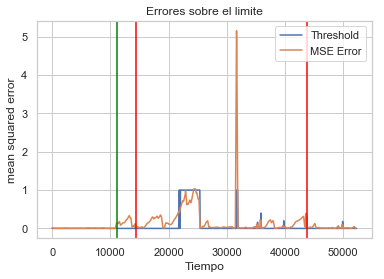

In [35]:
train_line = len(train_x)
infected_line = len(train_x) + len(test_x)
after_line = len(train_x) + len(test_x) + len(infected_x)
plt.plot(running_mean((errors>0.42).astype(int), 50)) #plot de errores que superan el limite
plt.plot(running_mean(errors, 200))  #plot del mse 
plt.title('Errores sobre el limite')
plt.axvline(x=train_line, color='green')
plt.axvline(x=infected_line, color='red')
plt.axvline(x=after_line, color='red')
plt.ylabel('mean squared error')
plt.xlabel('Tiempo')
plt.legend(['Threshold','MSE Error', ])
plt.show()

In [29]:
((train_error > 0.42).astype(int).mean(),
(test_error > 0.42).astype(int).mean(),
(infected_error > 0.42).astype(int).mean(),
(after_error > 0.42).astype(int).mean())

(0.0, 0.0, 0.12925493930016663, 0.0032448719434465174)

In [30]:
(np.median(train_error),
np.median(test_error),
np.median(infected_error),
np.median(after_error))

(0.003540218610719827,
 0.14663291573207315,
 0.046873226356429855,
 0.009526132483929167)

In [31]:
(np.median(train_error),
np.median(test_error),
np.median(infected_error),
np.median(after_error))

(0.003540218610719827,
 0.14663291573207315,
 0.046873226356429855,
 0.009526132483929167)

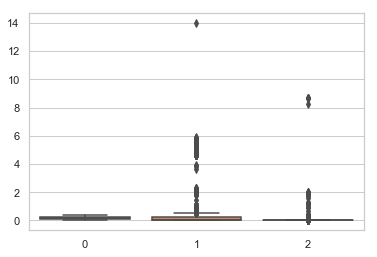

In [33]:
import seaborn as sns
sns.set(style="whitegrid")
all_arr = [test_error, infected_error, after_error]
ax = sns.boxplot(data=all_arr)
# ax = sns.boxplot(data=after_error)